## Testing Trades

In [1]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
register_matplotlib_converters()

In [2]:
company = 'WIPRO.NS'
data = web.DataReader(company, 'yahoo', '2016-01-01','2022-10-30')

In [3]:
# data = web.DataReader(company, 'yahoo', '2016-01-01','2022-10-30')
# data['return'] = np.log(data['Close'] / data['Close'].shift(1))
# lags = 5
# cols = []

# for lag in range(1, lags+1):
#     col = f'lag_{lag}'
#     data[col] = data['Close'].shift(lag)
#     cols.append(col)
# data.dropna(inplace=True)

In [4]:
# lags = 5
# cols = []

# for lag in range(1, lags+1):
#     col = f'lag_{lag}'
#     data[col] = data['Close'].shift(lag)
#     cols.append(col)
# data.dropna(inplace=True)

In [5]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-30,396.700012,387.500000,392.450012,394.250000,6785265.0,394.250000
2022-10-03,398.000000,390.600006,393.899994,394.500000,4070417.0,394.500000
2022-10-04,406.000000,399.000000,399.950012,405.500000,6295848.0,405.500000
2022-10-06,413.000000,407.450012,409.350006,410.149994,5601939.0,410.149994
2022-10-07,411.750000,406.250000,409.799988,408.100006,3790093.0,408.100006


In [6]:
# Calculate the Moving average of closing price

data['SMA1'] = data['Close'].rolling(window=20).mean()
data['SMA2'] = data['Close'].rolling(window=100).mean()

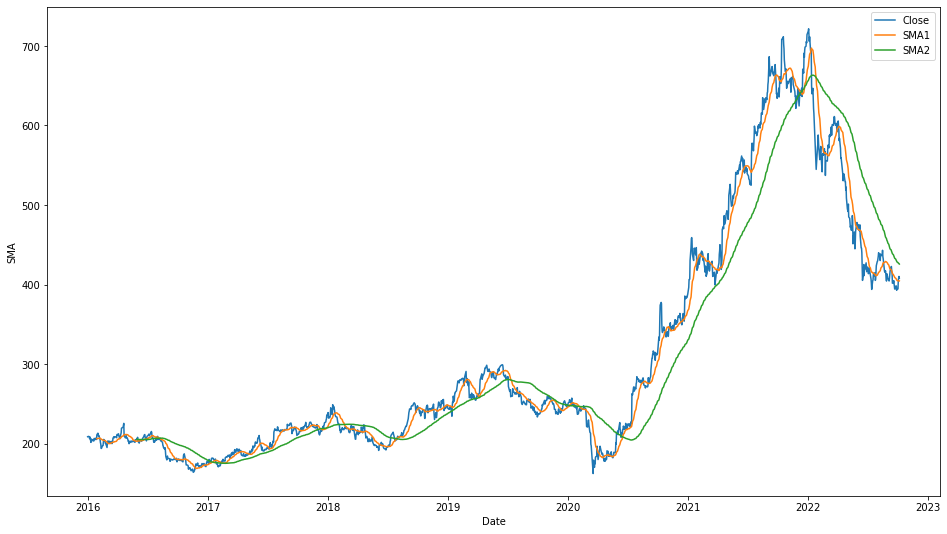

In [7]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(data.index, data['Close'], label = 'Close')

ax.plot(data['SMA1'].index, data['SMA1'], label= 'SMA1')
ax.plot(data['SMA2'].index, data['SMA2'], label= 'SMA2')
ax.set_xlabel('Date')
ax.set_ylabel('SMA')
ax.legend()

In [14]:
wipro = data['Close']
wipro_df = pd.DataFrame(wipro)

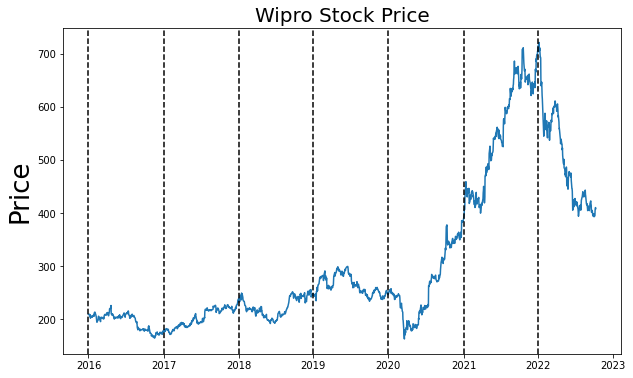

In [20]:
plt.figure(figsize = (10,6))
plt.plot(wipro_df.Close)
plt.title(f"Wipro Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


# Stationary: take first difference of the series

In [35]:
# take first difference
first_diff = wipro_df.Close.values[1:] - wipro_df.Close.values[:-1]
first_diff = np.concatenate([first_diff, [0]])

In [36]:
# set first differnce as variable in dataframe
wipro_df['first_difference'] = first_diff

In [37]:
wipro_df.head()

,Close,first_difference
Date,,
2016-01-01,208.668808,0.000000
2016-01-04,208.668808,0.468750
2016-01-05,209.137558,-0.300003
2016-01-06,208.837555,-0.675003
2016-01-07,208.162552,-1.968750


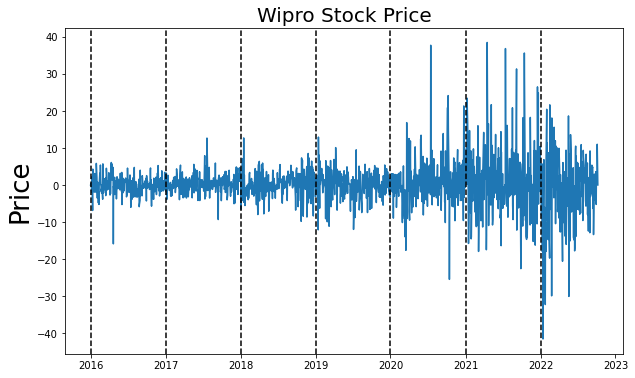

In [47]:
plt.figure(figsize = (10,6))
plt.plot(wipro_df.first_difference)
plt.title(f"Wipro Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


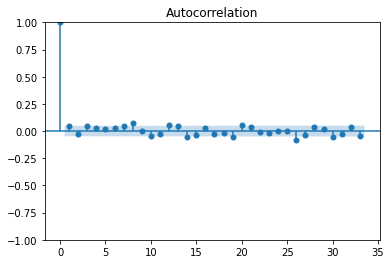

In [49]:
acf_plot = plot_acf(wipro_df.first_difference)

C:\Users\NEXT\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


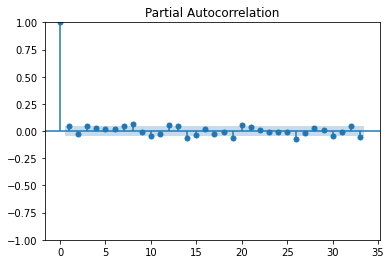

In [50]:
pacf_plot = plot_pacf(wipro_df.first_difference)

In [33]:
s.values

array([[2],
       [5],
       [6],
       [6],
       [4]], dtype=int64)

In [34]:
s[1:] - s[:-1]

,0
0,NaN
1,0.0
2,0.0
3,0.0
4,NaN


In [46]:
np.concatenate([s])

array([[2],
       [5],
       [6],
       [6],
       [4]], dtype=int64)